In [ ]:
#Dataset link
#https://drive.google.com/file/d/1cCkwiVv4mgfl20ntgY3n4yApcWqqZQe6/view

Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Importing Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
movies_data = pd.read_csv('movies_dataset.csv')
movies_data.head()


,Unnamed: 0,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,...,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,0,631842,Knock at the Cabin,Horror-Mystery-Thriller,en,While vacationing at a remote cabin a young gi...,3422.537,Blinding Edge Pictures-Universal Pictures-Film...,01-02-2023,20000000,...,100,Released,Save your family or save humanity. Make the ch...,6.457,888,Dave Bautista-Jonathan Groff-Ben Aldridge-Kris...,based on novel or book-sacrifice-cabin-faith-e...,/dm06L9pxDOL9jNSK4Cb6y139rrG.jpg,/zWDMQX0sPaW2u0N2pJaYA8bVVaJ.jpg,1058949-646389-772515-505642-143970-667216-104...
1,1,646389,Plane,Action-Adventure-Thriller,en,After a heroic job of successfully landing his...,2618.646,MadRiver Pictures-Di Bonaventura Pictures-G-BA...,12-01-2023,25000000,...,107,Released,Survive together or die alone.,6.901,785,Gerard Butler-Mike Colter-Yoson An-Tony Goldwy...,pilot-airplane-philippines-held hostage-plane ...,/qi9r5xBgcc9KTxlOLjssEbDgO0J.jpg,/9Rq14Eyrf7Tu1xk0Pl7VcNbNh1n.jpg,505642-758769-864692-631842-1058949-925943-758...
2,2,315162,Puss in Boots: The Last Wish,Animation-Adventure-Comedy-Family,en,Puss in Boots discovers that his passion for a...,2589.341,DreamWorks Animation-Universal Pictures,07-12-2022,90000000,...,103,Released,Say hola to his little friends.,8.402,4357,Antonio Banderas-Salma Hayek-Harvey Guillén-Wa...,fairy tale-talking dog-spin off-aftercreditsst...,/kuf6dutpsT0vSVehic3EZIqkOBt.jpg,/b1Y8SUb12gPHCSSSNlbX4nB3IKy.jpg,536554-76600-816904-653851-899112-985335-83078...
3,3,505642,Black Panther: Wakanda Forever,Action-Adventure-Science Fiction,en,Queen Ramonda Shuri M’Baku Okoye and the Dora ...,2525.408,Marvel Studios,09-11-2022,250000000,...,162,Released,Forever.,7.338,3922,Letitia Wright-Lupita Nyong'o-Danai Gurira-Win...,loss of loved one-hero-sequel-superhero-based ...,/sv1xJUazXeYqALzczSZ3O6nkH75.jpg,/xDMIl84Qo5Tsu62c9DGWhmPI67A.jpg,436270-829280-76600-56969-312634-1037858-238-5...
4,6,677179,Creed III,Drama-Action,en,After dominating the boxing world Adonis Creed...,1627.738,Metro-Goldwyn-Mayer-Proximity Media-Balboa Pro...,01-03-2023,0,...,116,Released,You can't run from your past.,6.950,209,Michael B. Jordan-Tessa Thompson-Jonathan Majo...,philadelphia pennsylvania-sequel-orphan-former...,/cvsXj3I9Q2iyyIo95AecSd1tad7.jpg,/26YLjaC1udGEmSvlM1P5eBGWO5h.jpg,100088-82856-937278-804150-806368-631842-96758...


<BarContainer object of 25 artists>

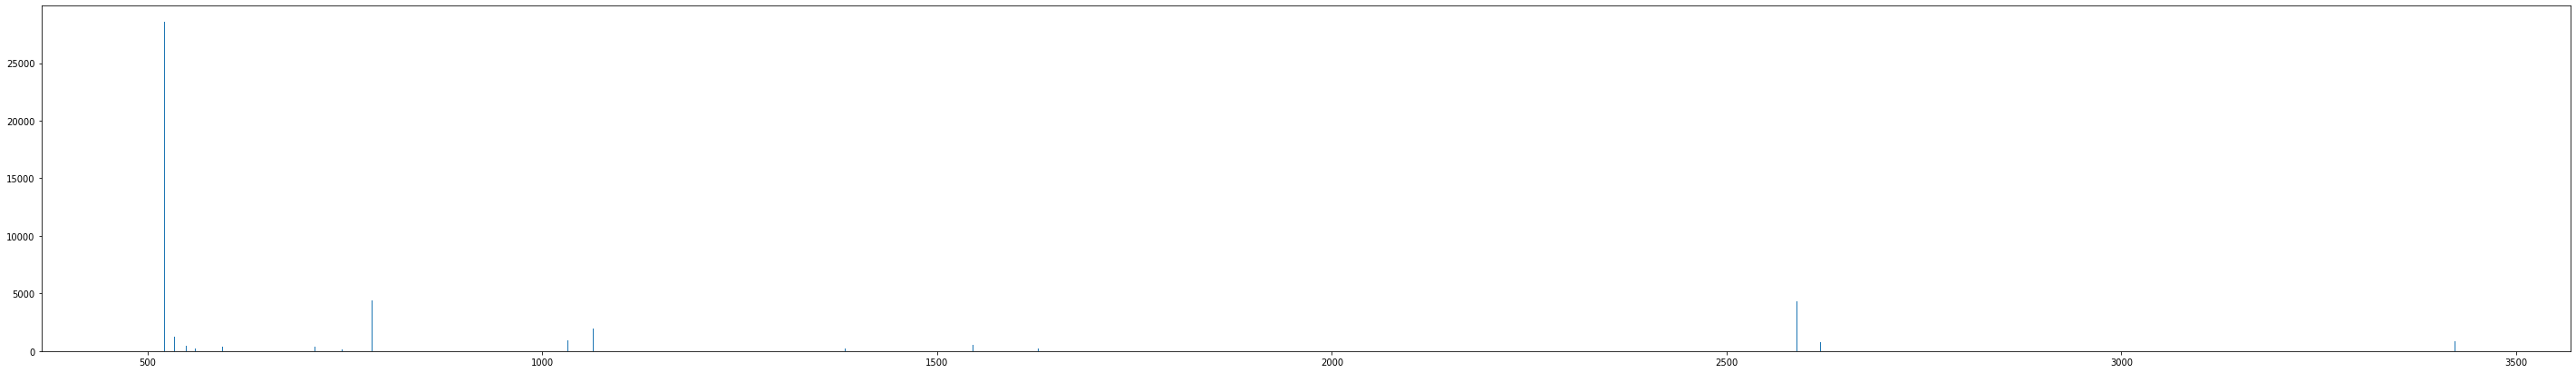

In [ ]:
# Setting DataFrame
df = pd.DataFrame(movies_data)

# Setting the variables
x_axis = df['popularity']
y_axis = df['vote_count']

# Figure Size
from matplotlib import pyplot as plt
fig = plt.figure(figsize =(50, 7))

# Create bar graph, contingency table using any 2 features.
plt.bar(x_axis[:25], y_axis[:25])

<AxesSubplot:xlabel='popularity', ylabel='vote_count'>

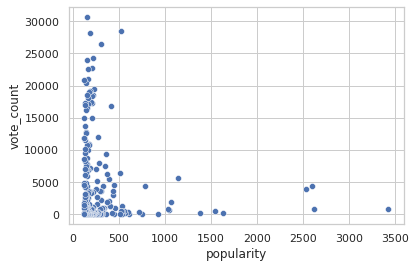

In [ ]:
#Plot Scatter plot using seaborn.
sns.set(style='whitegrid')
x_axis = df['popularity'].head(200)
y_axis = df['vote_count'].head(200)
sns.scatterplot(x=x_axis, y=y_axis, data=df)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1043.225'),
  Text(1, 0, '1064.609'),
  Text(2, 0, '1136.205'),
  Text(3, 0, '1383.465'),
  Text(4, 0, '1545.382'),
  Text(5, 0, '1627.738'),
  Text(6, 0, '2525.408'),
  Text(7, 0, '2589.341'),
  Text(8, 0, '2618.646'),
  Text(9, 0, '3422.537')])

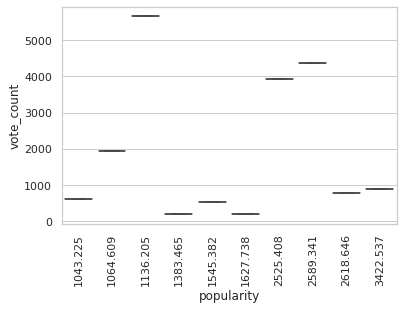

In [ ]:
#Plot box plot using seaborn.
x_axis = df['popularity'].head(10)
y_axis = df['vote_count'].head(10)
sns.boxplot( y=y_axis, x=x_axis);
plt.xticks(rotation = 90)

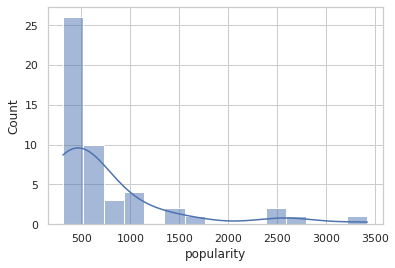

In [ ]:
from matplotlib import pyplot as plt
sns.histplot(df['popularity'][:50],kde = True)
plt.show()

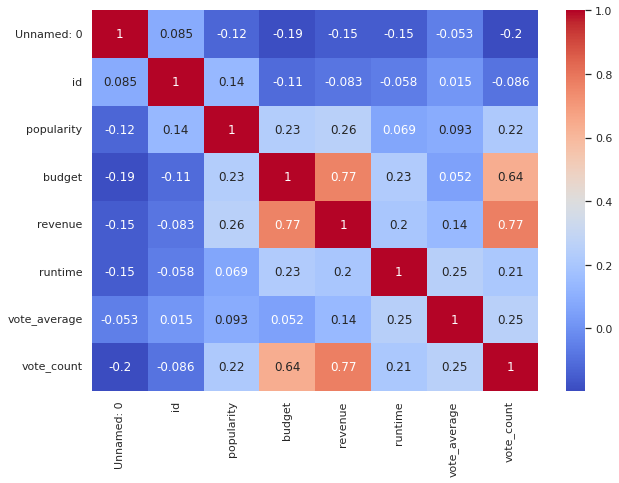

In [ ]:
#Heatmap
sns.set(rc={"figure.figsize":(10,7)})
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

In [ ]:
movies_data.shape

(14281, 21)

Selecting the relevant features for recommendation

In [ ]:
selected_features = ['genres','production_companies','tagline','keywords']
print(selected_features)

['genres', 'production_companies', 'tagline', 'keywords']


Replacing the null valuess with null string

In [ ]:
  for feature in selected_features:
    movies_data[feature] = movies_data[feature].fillna('')

Combining all the 5 selected features

In [ ]:
combined_features = movies_data['genres']+' '+movies_data['production_companies']+' '+movies_data['tagline']+' '+movies_data['keywords']
print(combined_features)

0        Horror-Mystery-Thriller Blinding Edge Pictures...
1        Action-Adventure-Thriller MadRiver Pictures-Di...
2        Animation-Adventure-Comedy-Family DreamWorks A...
3        Action-Adventure-Science Fiction Marvel Studio...
4        Drama-Action Metro-Goldwyn-Mayer-Proximity Med...
                               ...                        
14276    Action-Crime-Drama Rock n' Tape Films-Thunder ...
14277    Drama-Thriller Talko A short dandelion thrille...
14278    Drama Oz River Productions Four creative and s...
14279    Drama Henley Films A look at the lives of a gr...
14280    Drama Henley Films The life and struggles of a...
Length: 14281, dtype: object


Converting the text data to feature vectors

In [ ]:
vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(combined_features)
print(feature_vectors)

  (0, 20965)	0.19038799889178848
  (0, 17686)	0.15670411486224697
  (0, 17666)	0.08097615849915772
  (0, 19071)	0.1309159205230918
  (0, 18494)	0.16136814551288478
  (0, 8922)	0.12483644649458155
  (0, 8038)	0.06591403958540315
  (0, 19316)	0.15074818670845788
  (0, 5690)	0.11671642370338955
  (0, 4091)	0.09934911294970383
  (0, 597)	0.3969181093437635
  (0, 675)	0.12258871006592596
  (0, 12531)	0.12196973861349705
  (0, 11139)	0.13574028474047303
  (0, 10258)	0.11854899873606194
  (0, 1255)	0.1504710689309024
  (0, 15230)	0.05911845280754527
  (0, 7138)	0.13933630296625987
  (0, 7723)	0.1543402524588475
  (0, 3387)	0.16179949174274805
  (0, 18395)	0.149130105438026
  (0, 2841)	0.08330659531385225
  (0, 15051)	0.08403364439749851
  (0, 15311)	0.12274481186472237
  (0, 2108)	0.06697514072282856
  :	:
  (14279, 17666)	0.17649929565603975
  (14279, 15230)	0.25771450447146366
  (14279, 21441)	0.1002608715250964
  (14280, 23048)	0.49591469462196963
  (14280, 10030)	0.2305502419833218
  (142

Getting the similarity scores using cosine similarity

In [ ]:
similarity = cosine_similarity(feature_vectors)
print(similarity)
print(similarity.shape)

[[1.         0.04985375 0.05834649 ... 0.00604565 0.03875166 0.01490149]
 [0.04985375 1.         0.0245344  ... 0.         0.         0.        ]
 [0.05834649 0.0245344  1.         ... 0.03239987 0.05181809 0.01531977]
 ...
 [0.00604565 0.         0.03239987 ... 1.         0.19311802 0.2224459 ]
 [0.03875166 0.         0.05181809 ... 0.19311802 1.         0.35717359]
 [0.01490149 0.         0.01531977 ... 0.2224459  0.35717359 1.        ]]
(14281, 14281)


Getting the movie name from the user

In [ ]:
movie_name = input(' Enter your favourite movie name : ')

 Enter your favourite movie name : Avatar


Creating a list with all the movie names given in the dataset

In [ ]:
list_of_all_titles = movies_data['title'].tolist()
print(list_of_all_titles)

['Knock at the Cabin', 'Plane', 'Puss in Boots: The Last Wish', 'Black Panther: Wakanda Forever', 'Creed III', 'A Man Called Otto', 'Narvik', 'Avatar: The Way of Water', 'M3GAN', 'Shotgun Wedding', 'Ant-Man and the Wasp: Quantumania', 'Transfusion', 'Black Adam', "Magic Mike's Last Dance", 'JUNG_E', 'The Trip 6', 'Devotion', 'We Have a Ghost', "Roald Dahl's Matilda the Musical", 'Unicorn Wars', 'Troll', 'Prey for the Devil', 'Choose or Die', 'Avatar', 'Blood', 'Creed', 'The Pale Blue Eye', 'Creed II', 'The Offering', 'Demon Slayer -Kimetsu no Yaiba- The Movie: Mugen Train', 'Glass Onion: A Knives Out Mystery', 'Sniper: The White Raven', 'Spider-Man: No Way Home', 'Violent Night', 'The Woman King', 'Babylon', 'Thor: Love and Thunder', 'Scream', 'Top Gun: Maverick', "Guillermo del Toro's Pinocchio", 'The Chronicles of Narnia: The Lion, the Witch and the Wardrobe', 'Wolf Hound', 'The Batman', 'Terrifier 2', 'Jurassic World Dominion', 'Jujutsu Kaisen 0', 'Strange World', 'Teen Wolf: The Mo

Finding the close match for the movie name given by the user

In [ ]:
find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
print(find_close_match)

['Avatar', 'Awaara', 'Ava']


In [ ]:
close_match = find_close_match[0]
print(close_match)

Avatar


Finding the index of the movie with title

In [ ]:
index_of_the_movie = movies_data[movies_data.title == close_match]['Unnamed: 0'].values[0]
print(index_of_the_movie)

NameError: ignored

Getting a list of similar movies

In [ ]:
similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)

[(0, 0.011996708481499845), (1, 0.06543413906657083), (2, 0.0), (3, 0.028915872590421866), (4, 0.041376205779171), (5, 0.0181561251034847), (6, 0.014352572907200881), (7, 0.02349249100835583), (8, 0.0), (9, 0.02860322711104635), (10, 0.02860835465593924), (11, 0.025910900502740072), (12, 0.018626889931100794), (13, 0.03314610799810729), (14, 0.008257899000146432), (15, 0.00754380493252586), (16, 0.02991191326437205), (17, 0.022472714774091584), (18, 0.01911851521726546), (19, 0.00688853580783591), (20, 0.009088629165597623), (21, 0.007596559010776348), (22, 0.006613141428632272), (23, 0.022550069467257093), (24, 0.017622474623686567), (25, 0.0033928991185088733), (26, 0.0), (27, 0.033207916654324786), (28, 0.007297191241865308), (29, 0.012631984510148637), (30, 0.032881279233758776), (31, 0.01327833508607121), (32, 0.03174090911103862), (33, 0.008525324235787536), (34, 0.07424140079993521), (35, 0.0169982516941012), (36, 0.03364128338186883), (37, 0.02305663986630014), (38, 1.000000000

Sorting the movies based on their similarity score

In [ ]:
sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 
print(sorted_similar_movies)

[(38, 1.0000000000000002), (204, 0.3468999936906015), (3093, 0.2852819093046461), (4793, 0.24665266995180107), (78, 0.24396441398851942), (1546, 0.21561102030685603), (397, 0.21040623659696142), (7720, 0.20600388022677654), (3010, 0.20542105004346972), (13905, 0.2040588866863145), (138, 0.1995812885980731), (2767, 0.19178131753972774), (86, 0.18908561236290877), (2557, 0.1837534207716335), (2583, 0.18223312679587772), (2315, 0.177656898439017), (348, 0.17626626793169026), (2137, 0.17332777507651517), (1772, 0.17298004809215486), (8364, 0.17220964909575448), (8933, 0.17207057670673984), (4822, 0.16689420059831586), (3014, 0.16044080512108222), (2675, 0.1592283299138511), (2992, 0.15561763560267583), (10569, 0.15413717964711304), (12636, 0.1505281386163726), (1617, 0.14996633232271894), (7640, 0.14814189043322287), (8251, 0.14693539064951674), (2643, 0.14655540805640108), (304, 0.1465130724780781), (3133, 0.14623622942688472), (9158, 0.1430730895814933), (3294, 0.14266967829070915), (636

Print the name of similar movies based on the index

In [ ]:
print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = movies_data[movies_data.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

Movies suggested for you : 

1 . Top Gun: Maverick
2 . Top Gun
3 . Crimson Tide
4 . Flashdance
5 . Luck
6 . Gemini Man
7 . Bad Boys for Life
8 . Flyboys
9 . Enemy of the State
10 . About Love
11 . Blue's Big City Adventure
12 . Dangerous Minds
13 . Secret Headquarters
14 . Coyote Ugly
15 . Fast & Feel Love
16 . Days of Thunder
17 . World War Z
18 . Beverly Hills Cop II
19 . The Rock
20 . Cheech & Chong's Next Movie
21 . Geri's Game
22 . Airplane II: The Sequel
23 . Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb
24 . Beverly Hills Cop
25 . G.I. Jane
26 . In Harm's Way
27 . A Gun in Each Hand
28 . Bad Boys
29 . The Great Debaters
